In [100]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [133]:
FF_2017 = pd.read_excel('FF_2017.xlsx').drop(['TOTAL', 'Mean', 'Std', 'Median'],1)
labels = np.array(FF_2017['Team_Name'])
FF_2017

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,GoBias Industries,106.72,95.02,123.56,131.20,98.02,87.98,83.46,132.58,117.58,99.32,140.92,136.42,131.38,135.44
1,LeSean Hara,54.68,121.38,119.62,101.98,64.32,93.78,74.36,112.92,95.90,128.64,98.30,122.98,106.02,82.92
2,Winners Circle,73.24,104.14,78.70,107.12,120.54,85.04,89.54,102.26,91.72,98.96,90.20,99.94,87.76,110.04
3,Peyton Teabag,91.54,54.90,94.62,81.38,114.14,95.94,101.36,79.02,89.86,116.94,67.80,65.16,90.28,118.78
4,Brother Omega,111.00,85.88,105.60,77.10,86.00,123.40,88.22,95.02,85.28,108.98,105.68,125.68,119.04,116.94
5,Schmop,125.12,112.92,114.20,80.48,95.46,73.58,97.22,94.84,90.56,75.34,74.56,68.88,76.72,134.14
6,Mr. Fans Noodle Haus,60.70,68.90,103.40,101.88,88.22,92.92,128.38,122.62,101.56,94.92,103.56,63.98,84.88,80.30
7,Burnett = Microdong,106.24,88.72,113.62,75.96,84.64,79.02,120.08,99.38,92.82,66.34,132.80,131.96,108.26,104.32
8,That Sackwash Feel,63.94,95.72,58.58,86.98,126.50,93.36,96.92,113.76,94.18,110.86,108.50,108.72,126.62,84.88
9,Shiva Volodarskaya,77.68,97.50,43.42,75.82,51.12,82.14,66.90,62.12,74.60,66.40,69.68,102.06,86.88,40.74


In [51]:
averages = np.zeros(14)
for z in range(14):
    averages[z] = np.mean(FF_2017.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(168).reshape(12, 14)
for c in range(14):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF_2017.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([   83.88333333,   172.88333333,   266.87666667,   359.92      ,
         451.265     ,   540.84833333,   635.39      ,   730.52666667,
         818.05833333,   911.70166667,  1009.05666667,  1106.645     ,
        1207.995     ,  1307.58166667])

In [39]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

# Plotting 

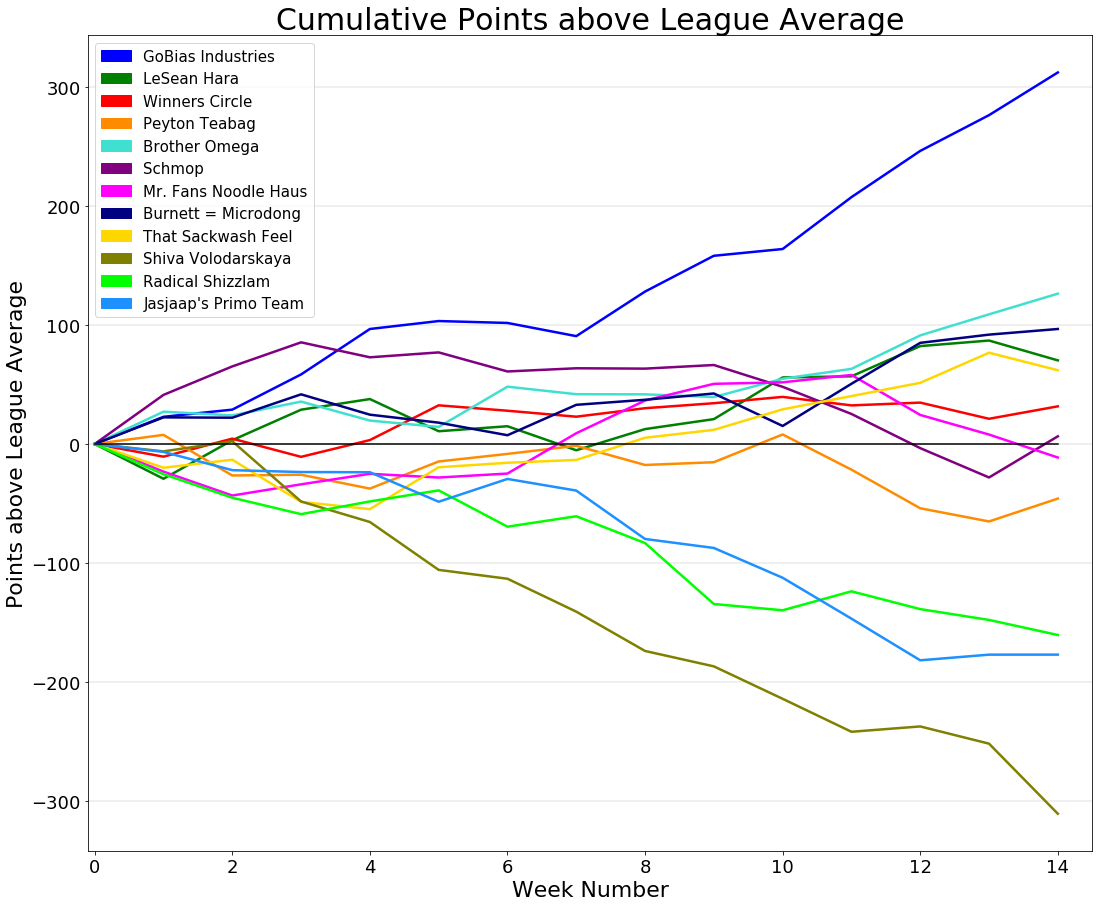

In [172]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,14], [0,0], color = 'k')

plt.xlim([-0.1, 14.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)

### Burnett's Astonishing Mid-Season Collapse 

In [131]:
Burnett = np.array(FF_2017.loc[5,'Week 1':])

Burn_rolling_means = np.zeros(12)
avg_rolling_means = np.zeros(12)
for i in range(12):
    Burn_rolling_means[i] = np.mean(Burnett[i:i+3])
    avg_rolling_means[i] = np.mean(averages[i:i+3])

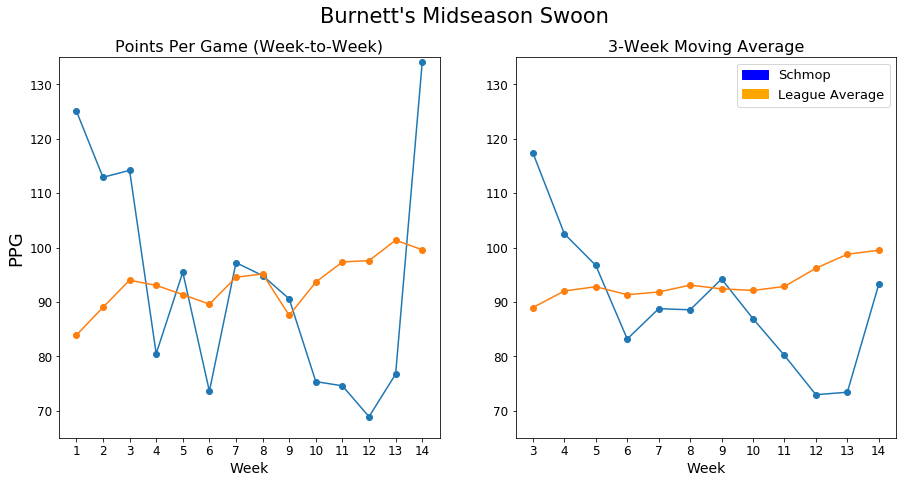

In [168]:
plt.figure(figsize=[15, 7])

burn_patch = mpatches.Patch(color='blue', label='Schmop')
avg_patch = mpatches.Patch(color='orange', label='League Average')

plt.suptitle("Burnett's Midseason Swoon", size=21)

plt.subplot(121)
plt.plot(Burnett, marker='o')
plt.plot(averages, marker='o')
plt.xticks(np.arange(14), ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'], size=12)
plt.yticks(size=12)
plt.ylabel('PPG', size=18)
plt.xlabel('Week', size=14)
plt.ylim([65, 135])
plt.title("Points Per Game (Week-to-Week)", size=16)

plt.subplot(122)
plt.plot(Burn_rolling_means, marker='o')
plt.plot(avg_rolling_means, marker='o')
plt.xticks(np.arange(12), ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'], size=12)
plt.xlabel('Week', size=14)
plt.yticks(size=12)
plt.ylim([65, 135])
plt.title("3-Week Moving Average", size=16)
plt.legend(handles=[burn_patch, avg_patch],prop={'size':13})
plt.show()

#Burnett never scored above 100 points in 10-game stretch